### Identitas

In [89]:
# Nama : Muhammad Farhan
# NIM : 13222114

## Library

In [90]:
# ----------- LIBRARY ---------------
"""
Library yang digunakan dalam kode ini adalah :
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

## CLEANING DATA

In [91]:
df = pd.read_excel(r"Data\13222114.xlsx")
ukuran = df.shape
print(f"DataFrame memiliki {ukuran[0]} baris dan {ukuran[1]} kolom.")

DataFrame memiliki 282 baris dan 150 kolom.


In [92]:
df.drop(df[df['Usia'] > 100].index, inplace=True)
ukuran = df.shape

# Mengganti simbol '%' dan mengubah tipe data menjadi float
df['Durasi Penggunaan Internet per Hari (dalam Jam)'] = df['Durasi Penggunaan Internet per Hari (dalam Jam)'].str.replace('%', '').astype(float)

# Mengubah persentase menjadi bentuk numerik
df['Durasi Penggunaan Internet per Hari (dalam Jam)'] = df['Durasi Penggunaan Internet per Hari (dalam Jam)'] / 100


print(f"DataFrame setelah cleansing umur memiliki {ukuran[0]} baris dan {ukuran[1]} kolom.")
print(df[:5])

DataFrame setelah cleansing umur memiliki 279 baris dan 150 kolom.
  Jenis Kelamin  Usia Pendidikan Terakhir            Pekerjaan  \
0        Wanita    24                  S1                 BUMD   
1          Pria    32                  S1  Pelajar / Mahasiswa   
2          Pria    47                  S2      Karyawan Swasta   
3          Pria    51                  S1      Karyawan Swasta   
4          Pria    24                  S1  Pelajar / Mahasiswa   

    Penghasilan per Bulan  Domisili  \
0  Rp 5 juta – Rp 10 juta      RIAU   
1             < Rp 2 juta   Jakarta   
2            > Rp 10 juta   Jakarta   
3  Rp 5 juta – Rp 10 juta   Bandung   
4   Rp 2 juta – Rp 5 juta  Surabaya   

   Durasi Penggunaan Internet per Hari (dalam Jam) Aktivitas Online Meningkat  \
0                                             12.0                         Ya   
1                                              5.0                  Sama saja   
2                                              3.0        

# NOMER 1

## Nomer 1.a

In [93]:
# NOMER 1

ukuran = df.shape
print("1.a Berapa dimensi dataset?")
print(f"DataFrame memiliki {ukuran[0]} baris dan {ukuran[1]} kolom.")


1.a Berapa dimensi dataset?
DataFrame memiliki 279 baris dan 150 kolom.


## Nomer 1.b

In [94]:
print("1.b Jumlah missing value per kolom?")
for col in df.columns:
    missing = df[col].isnull().sum()
    print(f"Jumlah missing value pada kolom '{col}': {missing}")

1.b Jumlah missing value per kolom?
Jumlah missing value pada kolom 'Jenis Kelamin': 0
Jumlah missing value pada kolom 'Usia': 0
Jumlah missing value pada kolom 'Pendidikan Terakhir': 0
Jumlah missing value pada kolom 'Pekerjaan': 0
Jumlah missing value pada kolom 'Penghasilan per Bulan': 0
Jumlah missing value pada kolom 'Domisili': 0
Jumlah missing value pada kolom 'Durasi Penggunaan Internet per Hari (dalam Jam)': 84
Jumlah missing value pada kolom 'Aktivitas Online Meningkat': 0
Jumlah missing value pada kolom 'Aktivitas yang Meningkat dalam 3 Bulan Terakhir': 95
Jumlah missing value pada kolom 'layanan_aktif_1': 43
Jumlah missing value pada kolom 'layanan_aktif_2': 133
Jumlah missing value pada kolom 'layanan_aktif_3': 256
Jumlah missing value pada kolom 'layanan_aktif_4': 224
Jumlah missing value pada kolom 'layanan_aktif_5': 264
Jumlah missing value pada kolom 'layanan_aktif_6': 268
Jumlah missing value pada kolom 'bank_1': 214
Jumlah missing value pada kolom 'bank_2': 212
Jumla

# Nomer 2

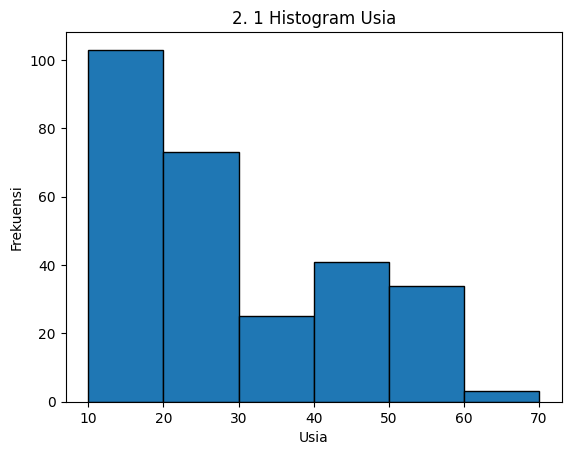

In [95]:
usia = df['Usia']

# Membuat rentang usia
bins = np.arange(10, usia.max() + 10, 10)

# Membuat histogram
plt.hist(usia, bins=bins, edgecolor='black')

plt.title('2. 1 Histogram Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

plt.show()

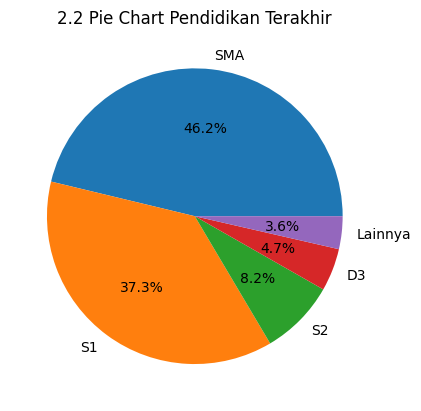

Nilai yang terkandung dalam 'Lainnya':
S3
SMP
D4


In [96]:
# Menghitung jumlah setiap nilai unik dan konversi ke persentase
counts = df['Pendidikan Terakhir'].value_counts(normalize=True) * 100

# Menyimpan nilai dengan presentase kurang dari 4% dalam variabel lain
nilai_lainnya = counts[counts < 4]

# Menggabungkan nilai dengan presentase kurang dari 4%
counts = counts[counts >= 4]
counts['Lainnya'] = nilai_lainnya.sum()

# Membuat pie chart
counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('2.2 Pie Chart Pendidikan Terakhir')
plt.ylabel('')  # Menghapus label sumbu y

plt.show()

# Mencetak nilai yang terkandung dalam 'Lainnya'
print("Nilai yang terkandung dalam 'Lainnya':")
for nilai in nilai_lainnya.index:
    print(nilai)


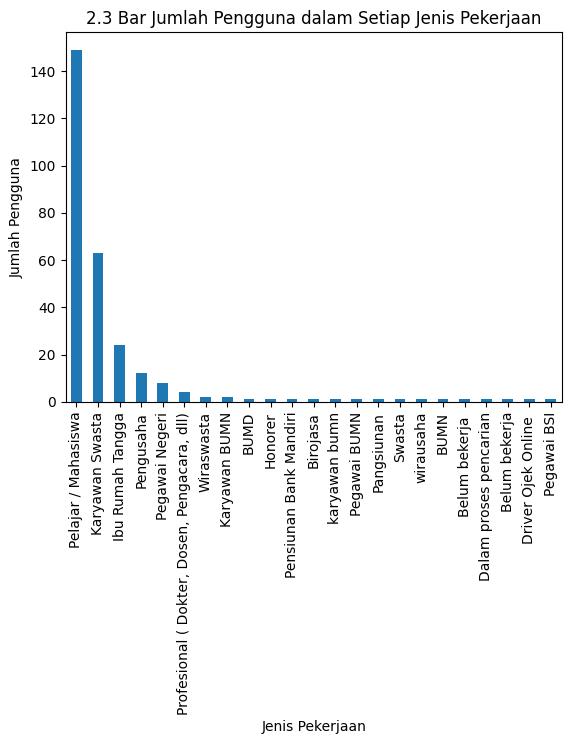

In [97]:
# Misalkan 'df' adalah DataFrame Anda dan 'Pekerjaan' adalah kolom yang berisi data pekerjaan
pekerjaan = df['Pekerjaan']

# Menghitung jumlah setiap jenis pekerjaan
counts = pekerjaan.value_counts()

# Membuat bar chart
counts.plot(kind='bar')

plt.title('2.3 Bar Jumlah Pengguna dalam Setiap Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Jumlah Pengguna')

plt.show()

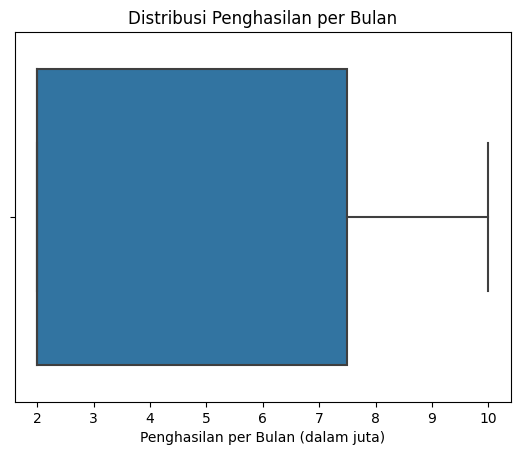

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengganti simbol mata uang dan spasi
penghasilan_per_bulan = df['Penghasilan per Bulan'].str.replace('Rp ', '').str.replace(' juta', '')

# Mengubah rentang penghasilan menjadi rata-rata
def rata_rata(rentang):
    if rentang.startswith('<'):
        return float(rentang.replace('< ', ''))
    elif rentang.startswith('>'):
        return float(rentang.replace('> ', ''))
    else:
        batas_bawah, batas_atas = rentang.split(' – ')
        return (float(batas_bawah) + float(batas_atas)) / 2

penghasilan_per_bulan = penghasilan_per_bulan.apply(rata_rata)

# Membuat box plot
sns.boxplot(x=penghasilan_per_bulan, orient='h')

plt.title('Distribusi Penghasilan per Bulan')
plt.xlabel('Penghasilan per Bulan (dalam juta)')

plt.show()


In [99]:
print(df.columns)

Index(['Jenis Kelamin', 'Usia', 'Pendidikan Terakhir', 'Pekerjaan',
       'Penghasilan per Bulan', 'Domisili',
       'Durasi Penggunaan Internet per Hari (dalam Jam)',
       'Aktivitas Online Meningkat',
       'Aktivitas yang Meningkat dalam 3 Bulan Terakhir', 'layanan_aktif_1',
       ...
       'cara_pembayaran_belanja_online_5', 'cara_pembayaran_belanja_online_6',
       'cara_pembayaran_belanja_online_7', 'cara_pembayaran_belanja_online_8',
       'keluhan_belanja_online_1', 'keluhan_belanja_online_2',
       'keluhan_belanja_online_3', 'keluhan_belanja_online_4',
       'keluhan_belanja_online_5', 'keluhan_belanja_online_6'],
      dtype='object', length=150)


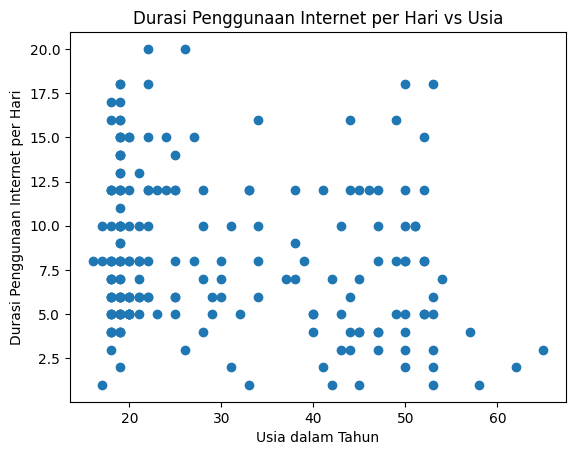

In [100]:
# Misalkan 'df' adalah DataFrame Anda dan 'Durasi Penggunaan Internet per Hari' dan 'Penghasilan per Bulan' adalah kolom yang berisi data yang relevan
internet = df['Durasi Penggunaan Internet per Hari (dalam Jam)']
Usia = df['Usia']

# Membuat scatter plot
plt.scatter(Usia, internet)

plt.title('Durasi Penggunaan Internet per Hari vs Usia')
plt.xlabel('Usia dalam Tahun')
plt.ylabel('Durasi Penggunaan Internet per Hari')

plt.show()

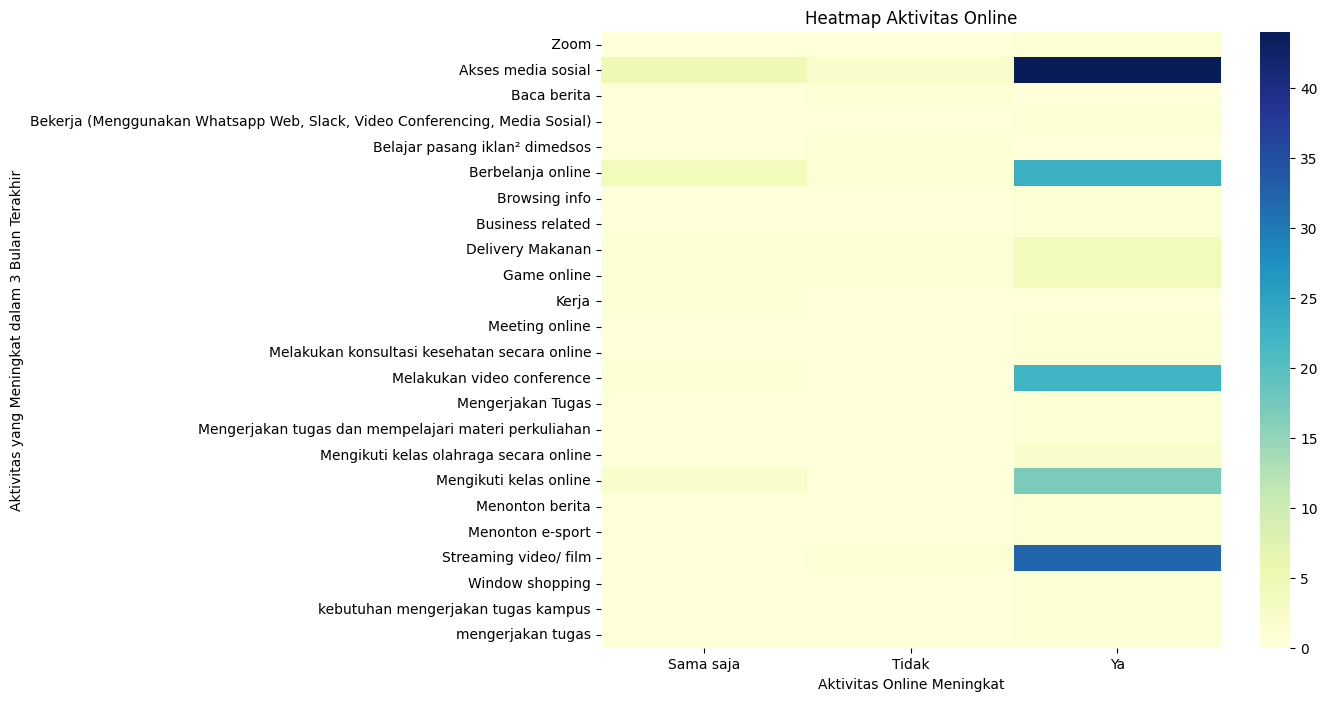

In [101]:

# Menghitung frekuensi setiap kombinasi aktivitas online
data = pd.crosstab(df['Aktivitas yang Meningkat dalam 3 Bulan Terakhir'], df['Aktivitas Online Meningkat'])

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data, cmap='YlGnBu')

plt.title('Heatmap Aktivitas Online')
plt.show()


In [102]:
# Menampilkan data unik di kolom "pekerjaan"
pekerjaan_unik = df['47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [tiket bioskop tiket wisata]'].unique()

print("Data unik di kolom 'pekerjaan':")
for pekerjaan in pekerjaan_unik:
    print(pekerjaan)

Data unik di kolom 'pekerjaan':
offline/ langsung datang ke toko fisik
online
nan


In [103]:
print(df[:5])

  Jenis Kelamin  Usia Pendidikan Terakhir            Pekerjaan  \
0        Wanita    24                  S1                 BUMD   
1          Pria    32                  S1  Pelajar / Mahasiswa   
2          Pria    47                  S2      Karyawan Swasta   
3          Pria    51                  S1      Karyawan Swasta   
4          Pria    24                  S1  Pelajar / Mahasiswa   

    Penghasilan per Bulan  Domisili  \
0  Rp 5 juta – Rp 10 juta      RIAU   
1             < Rp 2 juta   Jakarta   
2            > Rp 10 juta   Jakarta   
3  Rp 5 juta – Rp 10 juta   Bandung   
4   Rp 2 juta – Rp 5 juta  Surabaya   

   Durasi Penggunaan Internet per Hari (dalam Jam) Aktivitas Online Meningkat  \
0                                             12.0                         Ya   
1                                              5.0                  Sama saja   
2                                              3.0                         Ya   
3                                           

In [104]:
# Menghitung nilai unik dan persentasenya di kolom "Pekerjaan"
nilai_unik = df['Aktivitas Online Meningkat'].value_counts()
persentase = nilai_unik / len(df) * 100

# rata_rata_usia = df['Durasi Penggunaan Internet per Hari (dalam Jam)'].mean()


# # Menampilkan hasil
# print("Rata-rata nilai di kolom 'Usia':", rata_rata_usia)

#Menampilkan hasil
print("Jumlah kemunculan nilai unik di kolom 'Pekerjaan':")
print(nilai_unik)

print("\nPersentase kemunculan nilai unik di kolom 'Pekerjaan':")
print(persentase)

Jumlah kemunculan nilai unik di kolom 'Pekerjaan':
Aktivitas Online Meningkat
Ya           161
Sama saja     85
Tidak         33
Name: count, dtype: int64

Persentase kemunculan nilai unik di kolom 'Pekerjaan':
Aktivitas Online Meningkat
Ya           57.706093
Sama saja    30.465950
Tidak        11.827957
Name: count, dtype: float64


# Nomer 3

## Nomer 3.a

Confidence interval 95% for one-sample proportion (hitung confidence interval untuk 3 variabel yang berbeda, variabel bebas)

Confidence interval untuk Pendidikan Terakhir=S1: (0.32, 0.43)
Confidence interval untuk Pendidikan Terakhir=S2: (0.05, 0.11)
Confidence interval untuk Pendidikan Terakhir=D3: (0.02, 0.07)
Confidence interval untuk Pendidikan Terakhir=SMA: (0.40, 0.52)
Confidence interval untuk Pendidikan Terakhir=D4: (-0.00, 0.02)
Confidence interval untuk Pendidikan Terakhir=SMP: (-0.00, 0.02)
Confidence interval untuk Pendidikan Terakhir=S3: (0.00, 0.03)


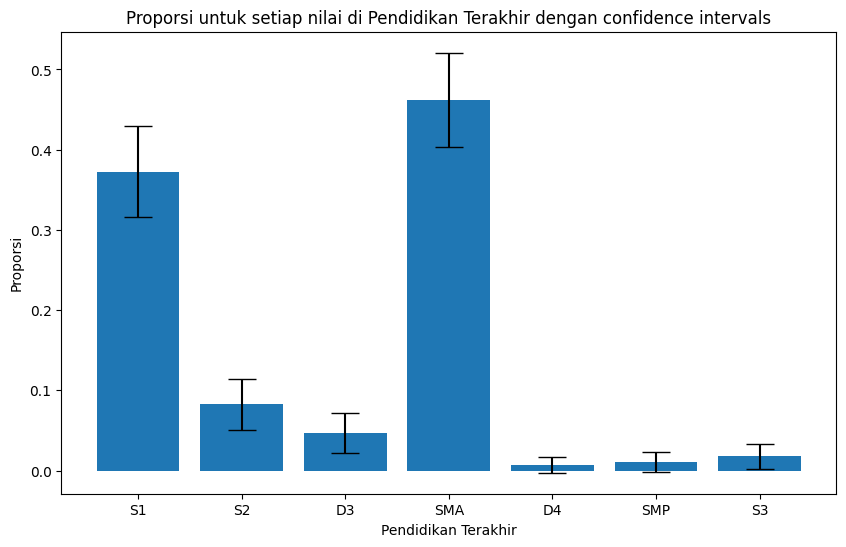

Confidence interval untuk Penghasilan per Bulan=Rp 5 juta – Rp 10 juta: (0.08, 0.15)
Confidence interval untuk Penghasilan per Bulan=< Rp 2 juta: (0.48, 0.59)
Confidence interval untuk Penghasilan per Bulan=> Rp 10 juta: (0.15, 0.25)
Confidence interval untuk Penghasilan per Bulan=Rp 2 juta – Rp 5 juta: (0.11, 0.19)


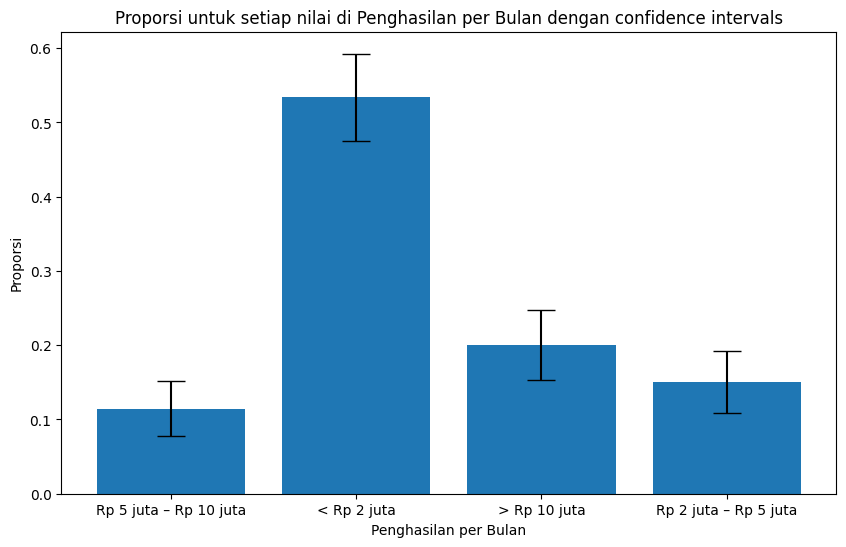

Confidence interval untuk Aktivitas Online Meningkat=Ya: (0.52, 0.64)
Confidence interval untuk Aktivitas Online Meningkat=Sama saja: (0.25, 0.36)
Confidence interval untuk Aktivitas Online Meningkat=Tidak: (0.08, 0.16)


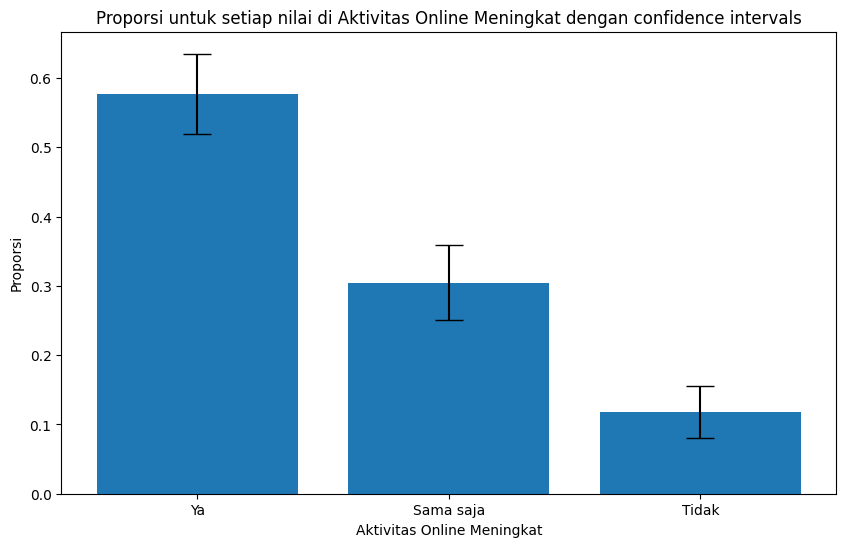

In [105]:
import matplotlib.pyplot as plt

# Fungsi untuk menghitung interval kepercayaan
def compute_confidence_interval(data, confidence=0.95):
    n = len(data)
    prop = np.mean(data)
    std_error = np.std(data) / np.sqrt(n)
    z = stats.norm.ppf(1 - (1 - confidence) / 2)
    moe = z * std_error
    return prop - moe, prop + moe

# Menghitung interval kepercayaan untuk setiap nilai unik dalam setiap variabel
for var in ['Pendidikan Terakhir', 'Penghasilan per Bulan', 'Aktivitas Online Meningkat']:
    unique_values = df[var].unique()
    proportions = []
    ci_lows = []
    ci_highs = []
    for value in unique_values:
        values = df[var].apply(lambda v: 1 if v == value else 0)
        prop = np.mean(values)
        ci_low, ci_high = compute_confidence_interval(values)
        proportions.append(prop)
        ci_lows.append(ci_low)
        ci_highs.append(ci_high)
        print(f'Confidence interval untuk {var}={value}: ({ci_low:.2f}, {ci_high:.2f})')

    # Membuat grafik batang
    plt.figure(figsize=(10, 6))
    plt.bar(unique_values, proportions, yerr=[np.array(proportions)-np.array(ci_lows), np.array(ci_highs)-np.array(proportions)], capsize=10)
    plt.xlabel(var)
    plt.ylabel('Proporsi')
    plt.title(f'Proporsi untuk setiap nilai di {var} dengan confidence intervals')
    plt.show()


## Nomer 3.b

One sample Z-test for proportion dengan alpha = 5% (lakukan 3 tes untuk variabel yang berbeda, variabel bebas)

In [106]:
import numpy as np
import statsmodels.api as sm

# Daftar variabel
variables = ['Jenis Kelamin', 'Pendidikan Terakhir', 'Pekerjaan']

# Nilai proporsi hipotesis nol
h0_prop = 0.5  # misalnya kita menguji apakah proporsi adalah 0.5

# Tingkat signifikansi
alpha = 0.05

for var in variables:
    unique_values = df[var].unique()
    for unique_value in unique_values:
        # Hitung proporsi sampel dan ukuran sampel
        sample_success = np.sum(df[var] == unique_value)
        n = len(df[var])

        # Cek apakah ada variasi dalam data
        if sample_success == 0 or sample_success == n:
            print(f"Untuk variabel {var} dengan nilai {unique_value}, semua nilai sama. Tidak dapat melakukan Z test.")
            continue

        # Hitung z-statistik dan p-value
        z_stat, p_value = sm.stats.proportions_ztest(sample_success, n, h0_prop)

        # Keputusan uji hipotesis
        if p_value < alpha:
            print(f"Untuk variabel {var} dengan nilai {unique_value}, kita menolak H0. Proporsi tidak sama dengan {h0_prop}.")
        else:
            print(f"Untuk variabel {var} dengan nilai {unique_value}, kita gagal menolak H0. Proporsi sama dengan {h0_prop}.")


Untuk variabel Jenis Kelamin dengan nilai Wanita, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Jenis Kelamin dengan nilai Pria, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Pendidikan Terakhir dengan nilai S1, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Pendidikan Terakhir dengan nilai S2, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Pendidikan Terakhir dengan nilai D3, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Pendidikan Terakhir dengan nilai SMA, kita gagal menolak H0. Proporsi sama dengan 0.5.
Untuk variabel Pendidikan Terakhir dengan nilai D4, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Pendidikan Terakhir dengan nilai SMP, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Pendidikan Terakhir dengan nilai S3, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Pekerjaan dengan nilai BUMD, kita menolak H0. Proporsi tidak sama dengan 0.5.
Un

## Nomer 3.c

Chi-squared test for goodness-of-fit test dengan alpha = 5% (H0: data distribution = uniform distribution, H1: data distribution ≠ uniform distribution) (lakukan 2 tes untuk variabel yang berbeda, variabel bebas)

In [107]:
# Buat salinan DataFrame
df_copy = df.copy()

# Daftar variabel
variables = ['Pekerjaan', 'Domisili']  # ganti dengan variabel yang ingin diuji

# Tingkat signifikansi
alpha = 0.05

for var in variables:
    # Buat DataFrame untuk frekuensi observasi dan frekuensi yang diharapkan
    operator = df_copy[var].value_counts().reset_index()
    operator.columns = [var, 'Oi']
    operator['Ei'] = 1/len(operator) * len(df_copy)

    # Hitung (Oi - Ei)^2 / Ei untuk setiap kategori
    operator['(Oi - Ei)^2 / Ei'] = operator.apply(lambda x: (x['Oi'] - x['Ei'])**2 / x['Ei'], axis=1)

    # Hitung chi-square statistic
    chi2 = operator['(Oi - Ei)^2 / Ei'].sum()

    # Hitung critical value
    df_copy_len = len(operator) - 1
    chi2_alpha = stats.chi2.ppf(1 - alpha, df_copy_len)

    # Keputusan uji hipotesis
    if chi2 < chi2_alpha:
        kesimpulan = 'chi2 di luar crit region, fail to reject H0'
    else:
        kesimpulan = 'chi2 di dalam crit region, reject H0'

    # Hitung p-value
    pval = (1 - stats.chi2.cdf(chi2, df_copy_len))

    print(f'''
    Hasil chi2 test untuk variabel {var}:
    chi2: {chi2:.2f}
    crit region: chi2 > {chi2_alpha:.2f}
    kesimpulan: {kesimpulan}
    p-value: {pval:.2f}
    ''')



    Hasil chi2 test untuk variabel Pekerjaan:
    chi2: 1946.23
    crit region: chi2 > 33.92
    kesimpulan: chi2 di dalam crit region, reject H0
    p-value: 0.00
    

    Hasil chi2 test untuk variabel Domisili:
    chi2: 1922.33
    crit region: chi2 > 68.67
    kesimpulan: chi2 di dalam crit region, reject H0
    p-value: 0.00
    


# Nomer 4

## 4.a

Confidence interval 95% for two-sample proportion difference (lakukan 3 tes untuk sepasang variabel yang berbeda, pasangan variabel bebas)

In [108]:
import numpy as np
import scipy.stats as stats

# Fungsi untuk menghitung interval kepercayaan untuk perbedaan proporsi dua sampel
def compute_confidence_interval_for_diff(p1, p2, n1, n2, confidence=0.95):
    z = stats.norm.ppf(1 - (1 - confidence) / 2)
    var = p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2
    moe = z * np.sqrt(var)
    return (p1 - p2) - moe, (p1 - p2) + moe

# Daftar pasangan variabel
pairs = [('Pendidikan Terakhir', 'Penghasilan per Bulan'), 
         ('Pendidikan Terakhir', 'Aktivitas Online Meningkat'), 
         ('Penghasilan per Bulan', 'Aktivitas Online Meningkat')]  # ganti dengan pasangan variabel yang ingin diuji

for pair in pairs:
    var1, var2 = pair
    unique_values_var1 = df[var1].unique()
    unique_values_var2 = df[var2].unique()

    for value1 in unique_values_var1:
        for value2 in unique_values_var2:
            values_var1 = df[var1].apply(lambda v: 1 if v == value1 else 0)
            values_var2 = df[var2].apply(lambda v: 1 if v == value2 else 0)

            p1 = np.mean(values_var1)
            p2 = np.mean(values_var2)
            n1 = len(values_var1)
            n2 = len(values_var2)

            ci_low, ci_high = compute_confidence_interval_for_diff(p1, p2, n1, n2)

            print(f'Confidence interval untuk perbedaan proporsi {var1}={value1} dan {var2}={value2}: ({ci_low:.2f}, {ci_high:.2f})')


Confidence interval untuk perbedaan proporsi Pendidikan Terakhir=S1 dan Penghasilan per Bulan=Rp 5 juta – Rp 10 juta: (0.19, 0.33)
Confidence interval untuk perbedaan proporsi Pendidikan Terakhir=S1 dan Penghasilan per Bulan=< Rp 2 juta: (-0.24, -0.08)
Confidence interval untuk perbedaan proporsi Pendidikan Terakhir=S1 dan Penghasilan per Bulan=> Rp 10 juta: (0.10, 0.25)
Confidence interval untuk perbedaan proporsi Pendidikan Terakhir=S1 dan Penghasilan per Bulan=Rp 2 juta – Rp 5 juta: (0.15, 0.29)
Confidence interval untuk perbedaan proporsi Pendidikan Terakhir=S2 dan Penghasilan per Bulan=Rp 5 juta – Rp 10 juta: (-0.08, 0.02)
Confidence interval untuk perbedaan proporsi Pendidikan Terakhir=S2 dan Penghasilan per Bulan=< Rp 2 juta: (-0.52, -0.38)
Confidence interval untuk perbedaan proporsi Pendidikan Terakhir=S2 dan Penghasilan per Bulan=> Rp 10 juta: (-0.18, -0.06)
Confidence interval untuk perbedaan proporsi Pendidikan Terakhir=S2 dan Penghasilan per Bulan=Rp 2 juta – Rp 5 juta: (-

## 4.b

Two-samples Z-test for proportion difference dengan alpha = 5% (lakukan 3 tes untuk sepasang variabel yang berbeda, pasangan variabel bebas)

## 4.c

Two-samples Z-test for proportion difference dengan alpha = 5% (lakukan 3 tes untuk sepasang variabel yang berbeda, pasangan variabel bebas)

In [119]:
import pandas as pd
import scipy.stats as stats

# Daftar pasangan variabel
pairs = [('Pekerjaan', 'Pendidikan Terakhir'), 
         ('Jenis Kelamin', 'Aktivitas Online Meningkat')]  # ganti dengan pasangan variabel yang ingin diuji

# Tingkat signifikansi
alpha = 0.05

for pair in pairs:
    var1, var2 = pair

    # Buat tabel kontingensi
    contingency_table = pd.crosstab(df[var1], df[var2])

    # Lakukan Chi-squared test for independence
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    # Keputusan uji hipotesis
    if p_value < alpha:
        print(f"Untuk pasangan variabel {var1} dan {var2}, kita menolak H0. Ada hubungan antara {var1} dan {var2}.")
    else:
        print(f"Untuk pasangan variabel {var1} dan {var2}, kita gagal menolak H0. Tidak ada hubungan antara {var1} dan {var2}.")


Untuk pasangan variabel Pekerjaan dan Pendidikan Terakhir, kita menolak H0. Ada hubungan antara Pekerjaan dan Pendidikan Terakhir.
Untuk pasangan variabel Jenis Kelamin dan Aktivitas Online Meningkat, kita gagal menolak H0. Tidak ada hubungan antara Jenis Kelamin dan Aktivitas Online Meningkat.


## 4.d

Chi-squared test for Homogeneity dengan alpha = 5%(lakukan 2 tes untuk sepasang variabel yang berbeda, pasangan variabel bebas)

# Nomer 5